In [1]:
using Distributions
using PyPlot
# not really sure why plt[:style]... doesn't just work
matplotlib[:pyplot][:style][:use]("ggplot")

In [2]:
x = [0.4; 0.6]
t = [0.05; -0.35]
alpha = 2.
beta = 10.

10.0

In [3]:
function calc_pred_dist(x, xs, t, alpha, beta)
    N = length(xs)
    S_N = ([alpha 0; 0 alpha] + N*beta*[1 mean(xs); mean(xs) mean(xs .* xs)])^-1
    mx = N*beta*[1 x]*S_N*[mean(t); mean(xs.*t);]
    s2x = beta^-1 + [1 x]*S_N*[1; x]
    mx[1], s2x[1]
end

calc_pred_dist (generic function with 1 method)

In [4]:
vs = linspace(0, 1, 100)
pred_dist = [calc_pred_dist(v, x, t, alpha, beta) for v in vs]
mus = [d[1] for d in pred_dist]
stds = [d[2] for d in pred_dist]
fill_between(v, mus + stds, mus - stds, facecolor=(1.0, 0.8, 0.8))
plot(v, mus)
scatter(x, t)
xlabel(L"$x$")
ylabel(L"$t$")

LoadError: LoadError: UndefVarError: v not defined
while loading In[4], in expression starting on line 5

In [5]:
function p_w(x, t, alpha, beta)
    N = length(x)
    S = ([alpha 0; 0 alpha] + N*beta*[1 mean(x); mean(x) mean(x.*x)])^-1
    m = N*beta*S*[mean(t); mean(x.*t)]
    m, S
end

p_w (generic function with 1 method)

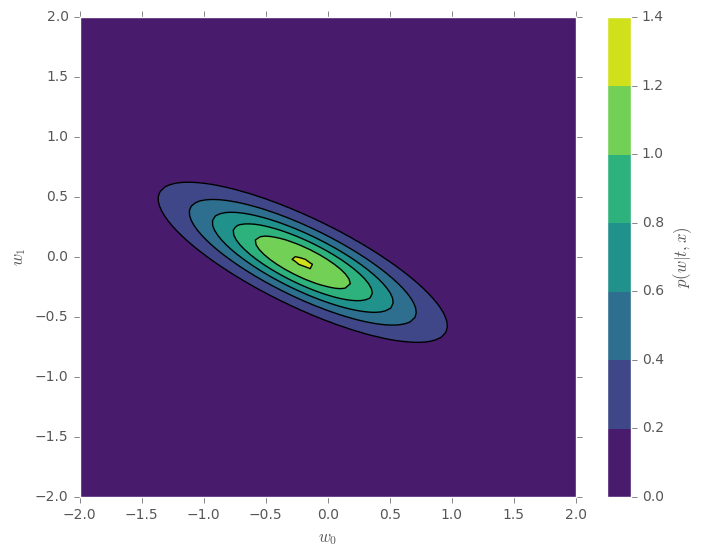

In [6]:
m_N, S_N = p_w(x, t, alpha, beta)
weights_dist = MvNormal(m_N, S_N)

n = 100
w_0 = linspace(-2, 2, n)
w_1 = linspace(-2, 2, n)
xgrid = repmat(w_0', n, 1)
ygrid = repmat(w_1, 1, n)

z = zeros(n,n)

for i in 1:n
    for j in 1:n
        z[i:i,j:j] = pdf(weights_dist, [w_0[i];w_1[j]])
    end
end
contour(xgrid, ygrid, z, linewidths=1, colors="k")
contourf(xgrid, ygrid, z, cmap=ColorMap("viridis"))
cb = colorbar()
cb[:set_label](L"$p(w|t, x)$")
xlabel(L"$w_0$")
ylabel(L"$w_1$")
savefig("plots/pw.png", bbox_inches="tight", dpi=300)

In [7]:
function f(x, w)
    [1 x] * w
end

f (generic function with 1 method)

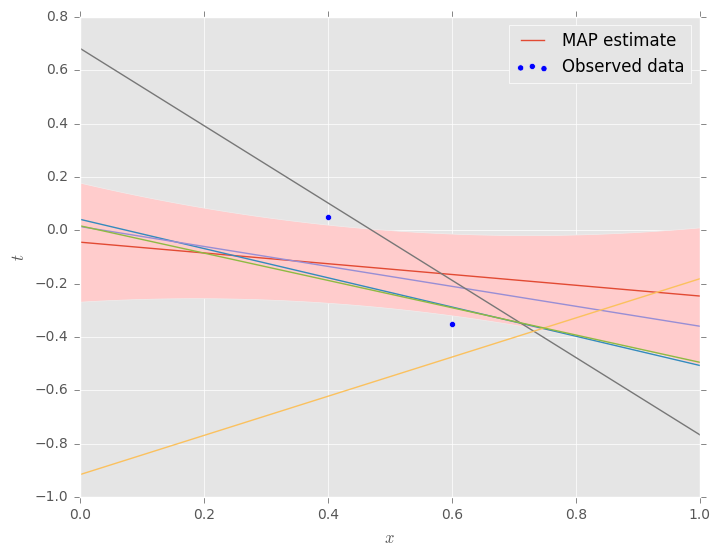

In [8]:
vs = linspace(0, 1, 100)
pred_dist = [calc_pred_dist(v, x, t, alpha, beta) for v in vs]
mus = [d[1] for d in pred_dist]
stds = [d[2] for d in pred_dist]
fill_between(vs, mus + stds, mus - stds, facecolor=(1.0, 0.8, 0.8))
plot(vs, mus, label="MAP estimate")
for _ in 1:5
    w = rand(weights_dist)
    y = [f(v, w) for v in vs]
    plot(vs, y)
end
scatter(x, t, label="Observed data")
xlabel(L"$x$")
ylabel(L"$t$")
xlim(0, 1)
legend()
savefig("plots/blr.png", bbox_inches="tight", dpi=300)

In [9]:
function nr_sin(x)
    x + cos(x)/sin(x)
end

nr_sin (generic function with 1 method)

Highest value: x=-1.5707963267948966, y=-1.0


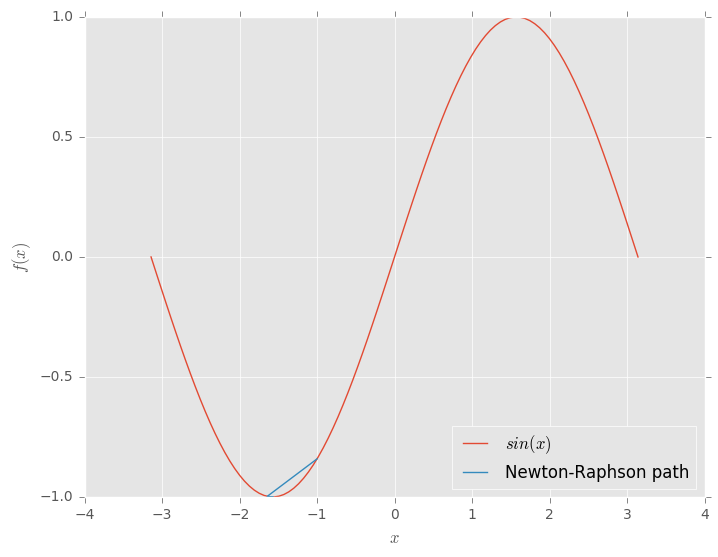

[-1.0,-1.64209,-1.57068,-1.5708,-1.5708,-1.5708]


PyObject <matplotlib.legend.Legend object at 0x000000001F2BF470>

In [10]:
xs = linspace(-pi, pi, 100)
y = sin(xs)
xpath = [-1.]
for _ in 1:5
    append!(xpath, nr_sin(xpath[end]))
end
println("Highest value: x=$(xpath[end]), y=$(sin(xpath[end]))")
println(xpath)
plot(xs, y, label=L"$sin(x)$")
plot(xpath, sin(xpath), label="Newton-Raphson path")
xlabel(L"$x$")
ylabel(L"$f(x)$")
legend(loc=4)


## Logistic Regression

In [68]:
phi = [1 1 1 1; 0.3 0.44 0.46 0.6]
t = float([1, 0, 1, 0])

4-element Array{Float64,1}:
 1.0
 0.0
 1.0
 0.0

In [69]:
function logistic_regression(phi, w, t, iterations=5)
    N = length(t)
    for _ in 1:iterations
        y = reshape(1. ./ (1+exp(-w' * phi)), N)
        R = diagm(y .* (1-y))
        z = phi' * w - inv(R) * (y - t)
        w = inv(phi*R*phi') * phi * R * z
        println(w)
    end
    w
end

logistic_regression (generic function with 3 methods)

, Any, Any) in module Main at In[66]:2 overwritten at In[69]:2.


In [70]:
w =[1, 1]
logistic_regression(phi, w, t)

[8.93409,-21.446]
[9.07164,-20.0288]
[9.69751,-21.5458]
[9.78116,-21.7359]
[9.78228,-21.7384]


2-element Array{Float64,1}:
   9.78228
 -21.7384 

In [71]:
data = readdlm("a010_irlsdata.txt")
X = data[:, 1:2]
C = data[:, 3]

1000-element Array{Float64,1}:
 1.0
 0.0
 0.0
 1.0
 1.0
 0.0
 1.0
 1.0
 0.0
 0.0
 0.0
 1.0
 0.0
 ⋮  
 1.0
 0.0
 0.0
 0.0
 1.0
 0.0
 1.0
 0.0
 1.0
 0.0
 0.0
 0.0

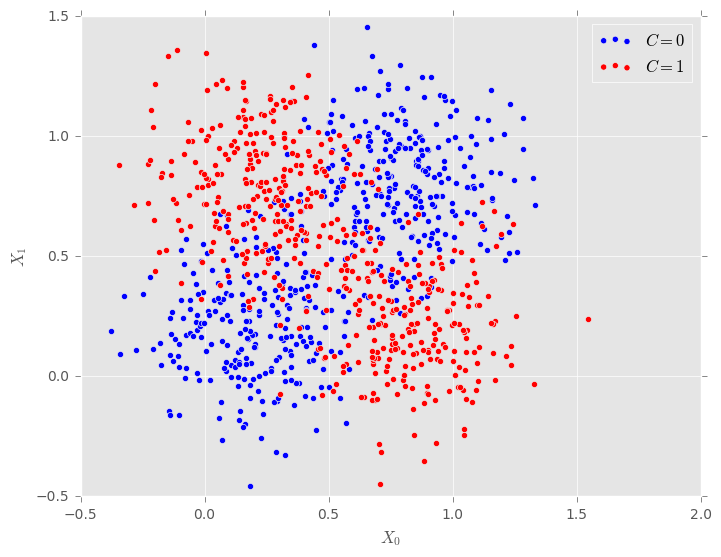

In [72]:
scatter(X[C .== 0, 1], X[C .== 0, 2], c="b", label=L"$C=0$")
scatter(X[C .== 1, 1], X[C .== 1, 2], c="r", label=L"$C=1$")
ylim(-0.5, 1.5)
xlabel(L"$X_0$")
ylabel(L"$X_1$")
legend()
savefig("plots/scatter.png", bbox_inches="tight", dpi=300)

In [73]:
function cross_entropy(y, t)
    -sum(t.*log(y) + (1-t).*log(1-y))
end

cross_entropy (generic function with 1 method)

, Any) in module Main at In[65]:2 overwritten at In[73]:2.


In [75]:
w = [0, 0, 0]
N = length(C)
phi = [ones(N)'; X[:, 1]'; X[:, 2]']
y = reshape(1. ./ (1+exp(-w' * phi)), N)
println("Cross Entropy=$(cross_entropy(y, C))")
w = logistic_regression(phi, w, C)
y = reshape(1. ./ (1+exp(-w' * phi)), N)
println("Cross Entropy=$(cross_entropy(y, C))")

Cross Entropy=693.1471805599465
[0.00440061,-0.0213844,-0.0492847]
[0.00440664,-0.0213915,-0.0493007]
[0.00440664,-0.0213915,-0.0493007]
[0.00440664,-0.0213915,-0.0493007]
[0.00440664,-0.0213915,-0.0493007]
Cross Entropy=692.9693594825372


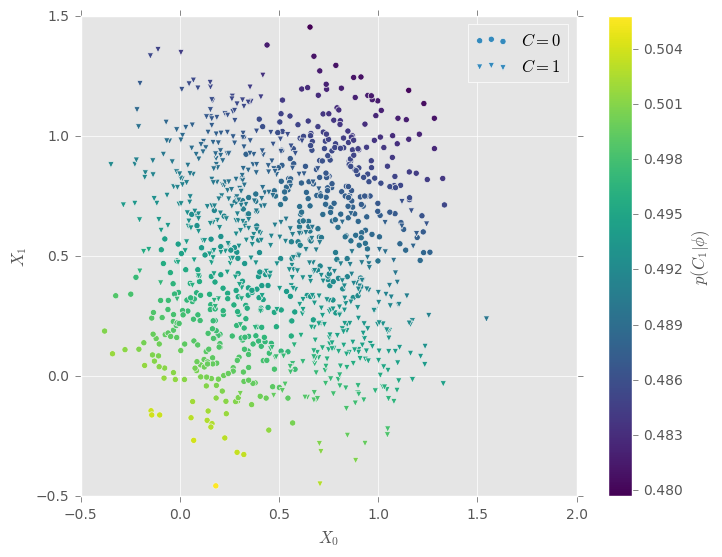

In [76]:
y_min, y_max = extrema(y)
scatter(X[C .== 0, 1], X[C .== 0, 2], c=y[C .== 0], marker="o", cmap=ColorMap("viridis"), vmin=y_min, vmax=y_max, label=L"$C=0$")
scatter(X[C .== 1, 1], X[C .== 1, 2], c=y[C .== 1], marker="v", cmap=ColorMap("viridis"), vmin=y_min, vmax=y_max, label=L"$C=1$")
cb = colorbar()
cb[:set_label](L"$p(C_1|\phi)$")
legend()
ylim(-0.5, 1.5)
xlabel(L"$X_0$")
ylabel(L"$X_1$")
savefig("plots/scatter_probs.png", bbox_inches="tight", dpi=300)

In [77]:
sigma = diagm([0.2, 0.2])
gauss_1 = MvNormal([0, 0], sigma)
gauss_2 = MvNormal([1, 1], sigma)
phi = zeros(3, N)
for i in 1:N
    phi[1, i] = 1
    phi[2, i] = pdf(gauss_1, X[i, :])
    phi[3, i] = pdf(gauss_2, X[i, :])
end

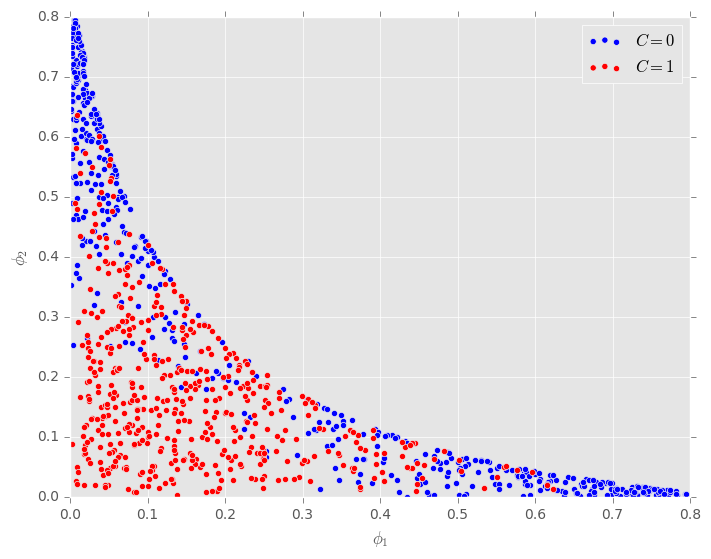

In [78]:
scatter(phi[2, C .== 0], phi[3, C .== 0], c="b", label=L"$C=0$")
scatter(phi[2, C .== 1], phi[3, C .== 1], c="r", label=L"$C=1$")
xlabel(L"$\phi_1$")
ylabel(L"$\phi_2$")
xlim(0, 0.8)
ylim(0, 0.8)
legend()
savefig("plots/scatter_gauss.png", bbox_inches="tight", dpi=300)

In [79]:
w = [0, 0, 0]
w = logistic_regression(phi, w, C)
y = reshape(1. ./ (1+exp(-w' * phi)), N)
println(cross_entropy(y, C))

[3.5205,-7.67372,-7.70842]
[5.51445,-11.9704,-12.0425]
[6.73114,-14.6021,-14.7064]
[7.08507,-15.3708,-15.4867]
[7.10826,-15.4212,-15.5381]
346.50408048251387


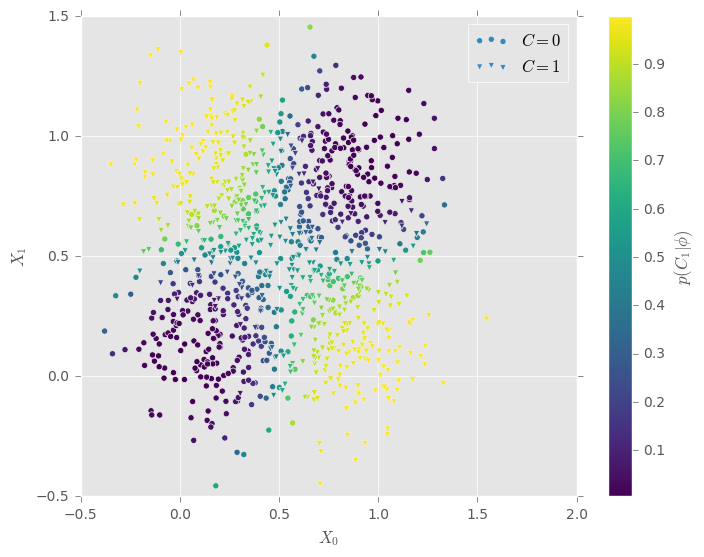

In [82]:
y_min, y_max = extrema(y)
scatter(X[C .== 0, 1], X[C .== 0, 2], c=y[C .== 0], marker="o", cmap=ColorMap("viridis"), vmin=y_min, vmax=y_max, label=L"$C=0$")
scatter(X[C .== 1, 1], X[C .== 1, 2], c=y[C .== 1], marker="v", cmap=ColorMap("viridis"), vmin=y_min, vmax=y_max, label=L"$C=1$")
cb = colorbar()
cb[:set_label](L"$p(C_1|\phi)$")
legend()
ylim(-0.5, 1.5)
xlabel(L"$X_0$")
ylabel(L"$X_1$")
savefig("plots/scatter_probs_gauss.png", bbox_inches="tight", dpi=300)

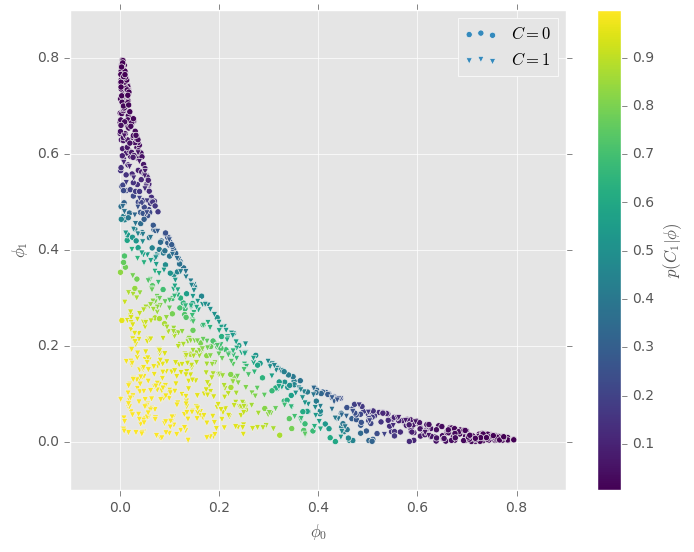

In [84]:
y_min, y_max = extrema(y)
scatter(phi[2, C .== 0], phi[3, C .== 0], c=y[C .== 0], marker="o", cmap=ColorMap("viridis"), vmin=y_min, vmax=y_max, label=L"$C=0$")
scatter(phi[2, C .== 1], phi[3, C .== 1], c=y[C .== 1], marker="v", cmap=ColorMap("viridis"), vmin=y_min, vmax=y_max, label=L"$C=1$")
cb = colorbar()
cb[:set_label](L"$p(C_1|\phi)$")
legend()
xlabel(L"$\phi_0$")
ylabel(L"$\phi_1$")
savefig("plots/scatter_probs_gauss_features.png", bbox_inches="tight", dpi=300)